In [1]:
from Multiatomic import *

### Example 3: $\mathrm{O_2}$, Interpolated, Velocity-Verlet, Ensemble

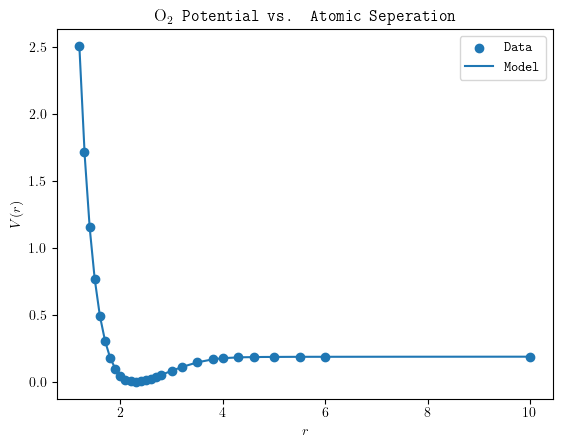

In [2]:
o2Data = np.genfromtxt('o2-potentials.dat', skip_header = 1, dtype = np.longdouble, delimiter = ' ')
xs = o2Data[:, 0]
ys = o2Data[:, 1]
noPoints = 1000
xPlot = np.linspace(np.min(xs), np.max(xs), noPoints)
yPlot = np.interp(xPlot, xs, ys)
plt.scatter(xs, ys, label = "Data")
plt.plot(xPlot, yPlot, label = "Model")
plt.xlabel("$r$")
plt.ylabel("$V(r)$")
plt.legend()
plt.title("$\mathrm{O_2}$ Potential vs. Atomic Seperation")
plt.show()

In [3]:
def o2Interpolated(atoms, params) -> float:
    if (debugMode):
        if (not isinstance(atoms, np.ndarray)):
            raise RuntimeError("Invalid atoms. Must be a NumPy array.")
        if (len(atoms) != 2):
            raise RuntimeError("Invalid no. atoms. Must be 2.")
        for atom in atoms:
            if (not isinstance(atom, Atom)):
                raise RuntimeError("Invalid atoms. Must be Atom type.")
    r = atoms[0].getPosition() - atoms[1].getPosition()
    lengthOfR = np.linalg.norm(r)
    return np.interp(lengthOfR, xs, ys)

In [4]:
kB = 3.166811563 * 10e-6 # Hartree / Kelvin
mass = 15.994 # Dalton
temperature = 100.0
noMolecules = 2
noPoints = 2 * noMolecules
v_x, v_y, v_z = sampleVelocities(kB, mass, temperature, noPoints)
ensemble = []
for i in range(0, noMolecules, 1):
    atom1 = Atom("Atom1", 15.994, np.array([-1.0, 0.0, 0.0]), np.array([v_x[i], v_y[i], v_z[i]]), np.array([0.0, 0.0, 0.0]))
    atom2 = Atom("Atom2", 15.994, np.array([1.0, 0.0, 0.0]), np.array([v_x[noMolecules + i], v_y[noMolecules + i], v_z[noMolecules + i]]), np.array([0.0, 0.0, 0.0]))
    atoms = np.array([atom1, atom2])
    potential = Potential(o2Interpolated)
    ensemble.append(MolecularSystem(atoms, potential))
integratorName = "velocityVerlet"
filepath = thisdir / 'Multiatomic3'
N = 10000
deltaT = 0.001
startTime = time.time()
for i in range(0, noMolecules, 1):
    ensemble[i] = simulate(filepath, ensemble[i], integratorName, N, deltaT)
endTime = time.time()
print("Simulation Time:", endTime - startTime, "seconds")

Simulation Time: 58.21713590621948 seconds


In [5]:
aspath = filepath / 'AtomicSeparations.csv'
avdir = filepath / 'AtomicVelocities'
enpath = filepath / 'Energies.csv'

In [6]:
atomicSeparations = pd.read_csv(aspath)
energies = pd.read_csv(enpath)
vv = energies
print("Initial Total Energy:", energies["TE"].iat[0])
print("Final Total Energy:", energies["TE"].iat[-1])
print("Average Total Energy:", np.mean(energies["TE"]))
print("Std. Total Energy:", np.std(energies["TE"]))
print("Average Atomic Separation:", np.mean(atomicSeparations["Atom1-Atom2"]))
print("Std. Atomic Separation:", np.std(atomicSeparations["Atom1-Atom2"]))

Initial Total Energy: 0.0485174318432943
Final Total Energy: 0.0485173235012645
Average Total Energy: 0.04851819767722182
Std. Total Energy: 1.3527082014118312e-06
Average Atomic Separation: 2.3909936764450035
Std. Atomic Separation: 0.25172704743523533
